TASK 2: MOVIE RATING PREDICTION WITH PYTHON

NAME : MANISH KUMAR

BATCH : JULY

DOMAIN : DATA SCIENCE

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df= pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.shape

(15509, 10)

In [6]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [7]:
df.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
df.drop_duplicates(inplace=True)

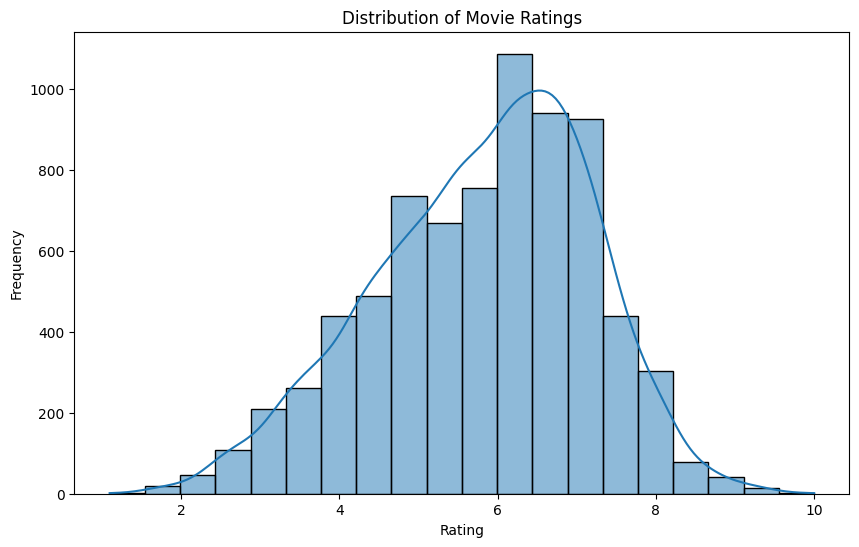

In [21]:
# Visualize rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



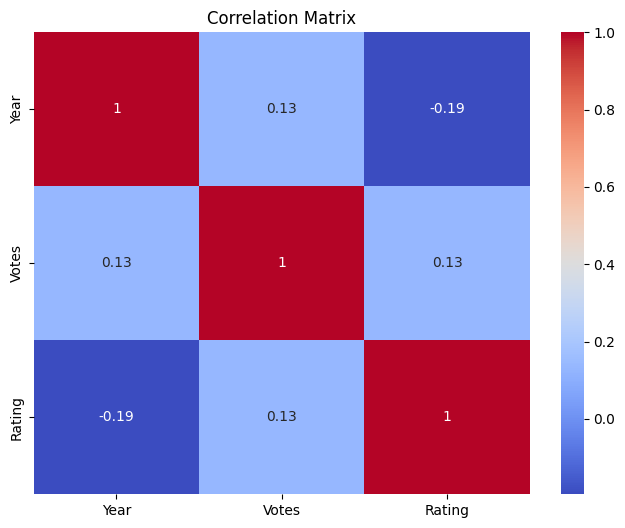

In [24]:
# Correlation matrix for numerical features
# Convert 'Year' and 'Votes' to numeric, coercing errors
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})').astype(float)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False).astype(float)

numerical_features = ['Year', 'Votes']

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features + ['Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

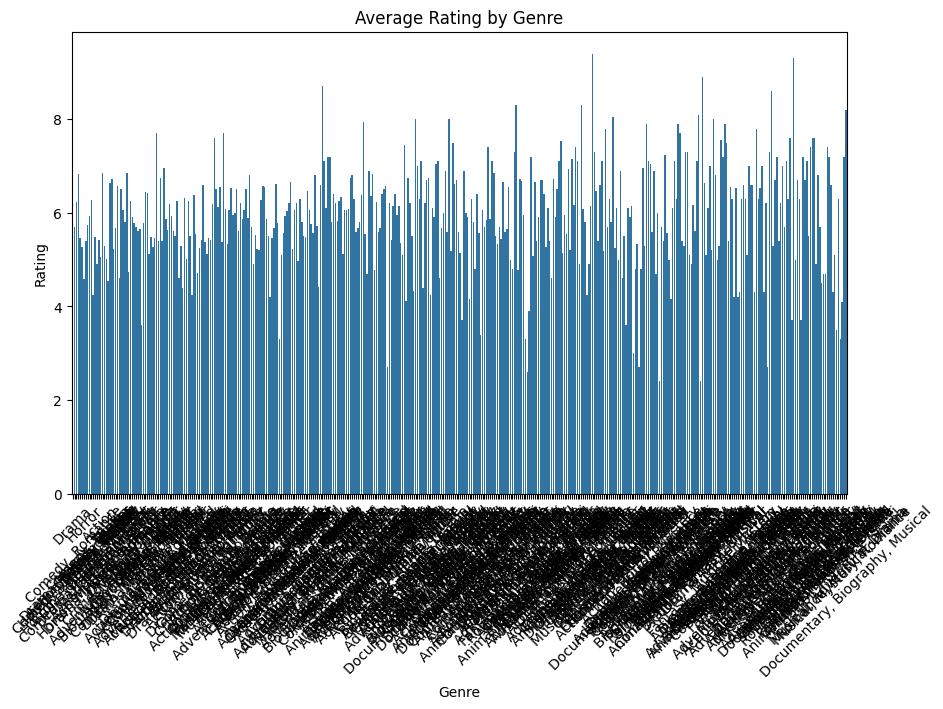

In [27]:
# Average rating by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Rating', data=df, errorbar=None)
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.show()

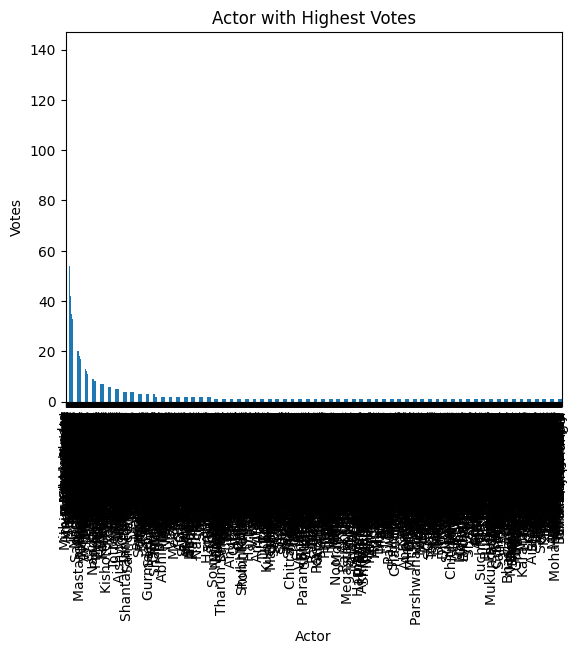

In [10]:
df['Actor 1'].value_counts().plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Votes')
plt.title('Actor with Highest Votes')
plt.show()

In [11]:
# You can use One-Hot Encoding for genre and director
encoded = pd.get_dummies(df[['Genre', 'Director']], drop_first=True)

# You may need to select top actors (most frequent) to avoid overfitting
# Addressing only 'Actor 1' for now as an example
top_actors = df['Actor 1'].value_counts().head(10).index
df['Actor 1_top'] = df['Actor 1'].apply(lambda x: x if x in top_actors else 'Other')
actors_encoded = pd.get_dummies(df['Actor 1_top'], drop_first=True)

# Combine all features
X = pd.concat([encoded, actors_encoded], axis=1)
y = df['Rating']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [15]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression R2 Score: -0.07037059482921282
Random Forest R2 Score: 0.04942979945491521
Linear Regression RMSE: 1.408269384124208
Random Forest RMSE: 1.327121700714186


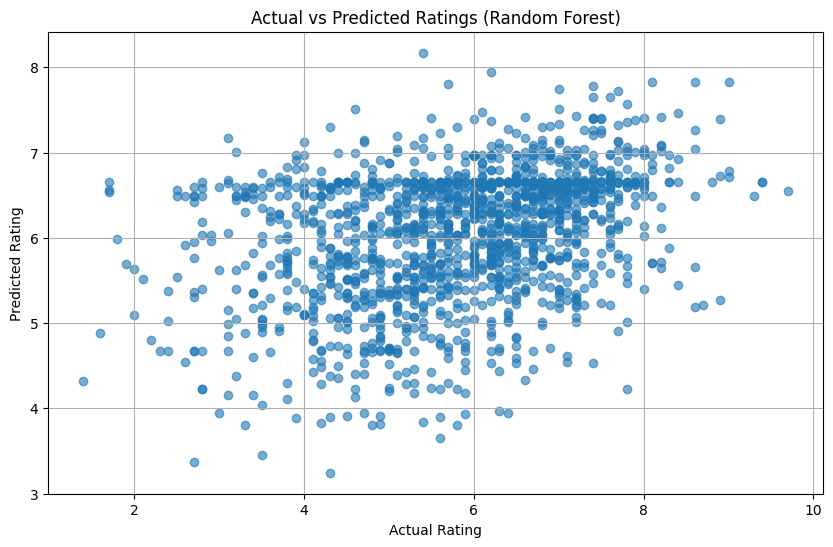

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.grid(True)
plt.show()
